In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

In [3]:
results_path = '~/sims_n_results/nucmoles_opusupdate_aug2019/'
tamuNoRatio_path = results_path + 'tamuNoRatio/'
tamuRatio_path = results_path + 'tamuRatio/'
sfco_path = results_path + 'sfco/'

uncs = [0.05, 0.1, 0.15, 0.2]
job_dirs = ['Job' + str(i) + '_unc' + str(unc) for i, unc in enumerate(uncs)]
dfs = {}
for i, unc_job in enumerate(job_dirs):
    dfs['dfTamu' + str(i)] = pd.read_csv(tamuNoRatio_path + unc_job + '/' + unc_job + '.csv')
    dfs['dfTamuRatio' + str(i)] = pd.read_csv(tamuRatio_path + unc_job + '/' + unc_job + '.csv')
    dfs['dfSfco' + str(i)] = pd.read_csv(sfco_path + unc_job + '/' + unc_job + '.csv')

In [4]:
dfs.keys()

dict_keys(['dfTamu0', 'dfTamuRatio0', 'dfSfco0', 'dfTamu1', 'dfTamuRatio1', 'dfSfco1', 'dfTamu2', 'dfTamuRatio2', 'dfSfco2', 'dfTamu3', 'dfTamuRatio3', 'dfSfco3'])

In [5]:
for dfname in list(dfs.keys()):
    df = dfs[dfname]
    df['AdjDiff'] = df['MaxLogLL'] - df['2ndMaxLogLL']
    df['RelAdjDiff_MinLL0.01'] = df['AdjDiff'] / df['MaxLogLL']  - df['CDF_LogLL_0.01']
    df['RelAdjDiff_MinLL0.1'] = df['AdjDiff'] / df['MaxLogLL']  - df['CDF_LogLL_0.1']
    df['Percent_Burnup_Error'] = df['Burnup_Error'] / df['Burnup']

In [6]:
def get_cdf(sample):
    ecdf = sm.distributions.ECDF(sample)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    return x, y

In [16]:
def plot_db_cdfs(dfname, metric):

    df0 = dfs['df' + dfname + '0']
    df1 = dfs['df' + dfname + '1']
    df2 = dfs['df' + dfname + '2']
    df3 = dfs['df' + dfname + '3']
    
    x0, y0 = get_cdf(df0[metric])
    x1, y1 = get_cdf(df1[metric])
    x2, y2 = get_cdf(df2[metric])
    x3, y3 = get_cdf(df3[metric])
    
    plt.clf()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    ax.plot(x0, y0, 'o-', color=colors['MBrwn'], mew=0, ms=5, label="5% Uncertainty")
    ax.plot(x1, y1, 'o-', color=colors['MTeal'], mew=0, ms=5, label="10% Uncertainty")
    ax.plot(x2, y2, 'o-', color=colors['MPurp'], mew=0, ms=5, label="15% Uncertainty")
    ax.plot(x3, y3, 'o-', color=colors['DBrwn'], mew=0, ms=5, label="20% Uncertainty")
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')#'right', bbox_to_anchor=(1.4, 0.5))    
    
    metrictitle = {'RelAdjDiff_MinLL0.01': ['Relative Adjacent Difference', 'MinLL is 1th %ile'], 
                   'RelAdjDiff_MinLL0.1': ['Relative Adjacent Difference', 'MinLL is 10th %ile'], 
                   'Percent_Burnup_Error' : ['Relative Burnup Error', 'Burnup Error']}
    dftitle = {'Tamu': '15 Iso DB', 'TamuRatio': '10 Ratio DB', 'Sfco' : 'SFCOMPO'}

    ax.set_xlabel(metrictitle[metric][0], fontsize=20, labelpad=15)
    ax.set_ylabel('CDF', fontsize=20, labelpad=15)
    
    title_str = 'CDF for ' + dftitle[dfname] + ' predictions'
    subtitle_str = metrictitle[metric][1]
    plt.suptitle(title_str, y=1.01, fontsize=15)
    plt.title(subtitle_str, fontsize=15, pad=15)
    
    #ax.set_xlim(0, 250)
    plt.show()
    
    #fig.savefig('../plots/xxx_cdf_' + dfname + '.png', bbox_inches='tight', transparent=True)

# Relative Adjacent Difference CDFs

$$\frac{MaxLL - AdjLL}{MaxLL - MinLL}$$
$$where$$
$$MinLL = LogLikelihood \, @ \, 1^{th} \, or \, 10^{th} \, percentile$$

## 15 Iso DB

<Figure size 432x288 with 0 Axes>

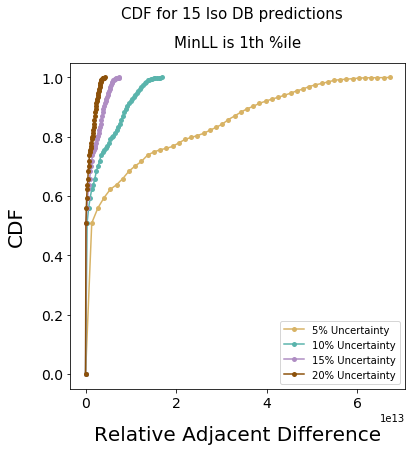

<Figure size 432x288 with 0 Axes>

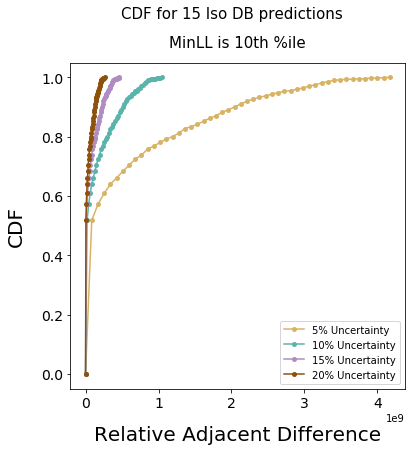

In [10]:
plot_db_cdfs('Tamu', 'RelAdjDiff_MinLL0.01')
plot_db_cdfs('Tamu', 'RelAdjDiff_MinLL0.1')

## 10 Iso Ratio DB

<Figure size 432x288 with 0 Axes>

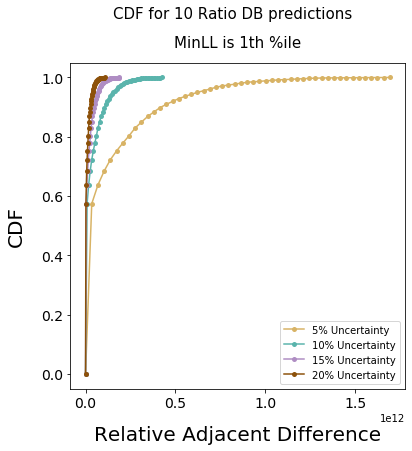

<Figure size 432x288 with 0 Axes>

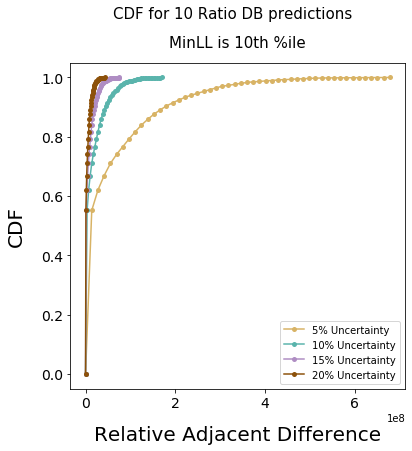

In [11]:
plot_db_cdfs('TamuRatio', 'RelAdjDiff_MinLL0.01')
plot_db_cdfs('TamuRatio', 'RelAdjDiff_MinLL0.1')

## SFCOMPO test set

<Figure size 432x288 with 0 Axes>

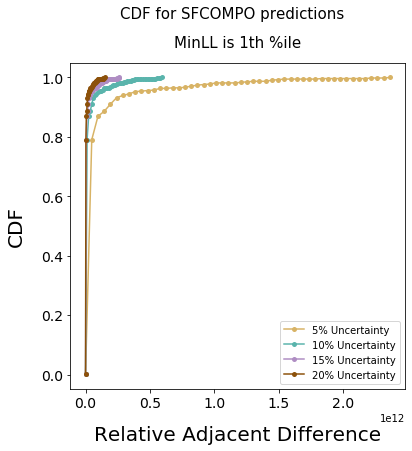

<Figure size 432x288 with 0 Axes>

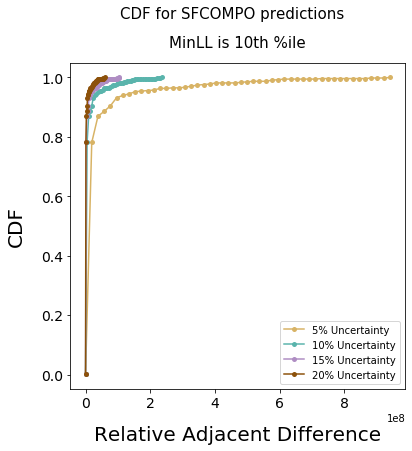

In [12]:
plot_db_cdfs('Sfco', 'RelAdjDiff_MinLL0.01')
plot_db_cdfs('Sfco', 'RelAdjDiff_MinLL0.1')

# Relative Error CDFs

## Burnup

<Figure size 432x288 with 0 Axes>

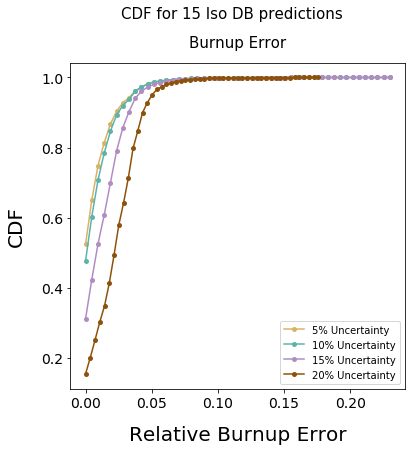

<Figure size 432x288 with 0 Axes>

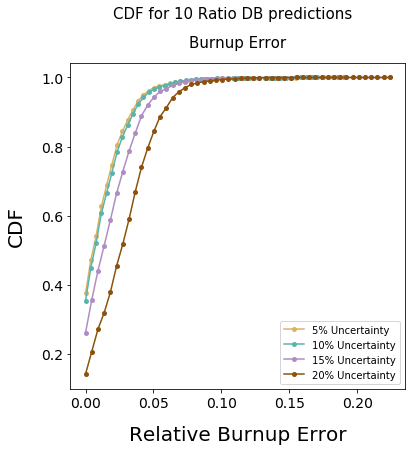

<Figure size 432x288 with 0 Axes>

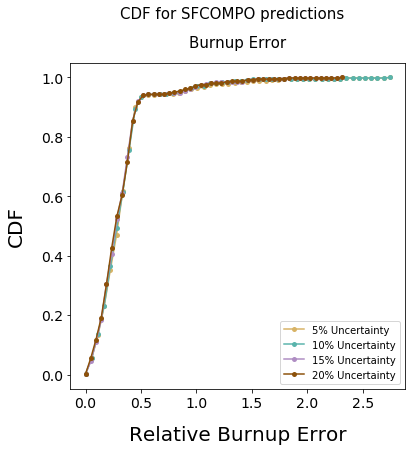

In [17]:
plot_db_cdfs('Tamu', 'Percent_Burnup_Error')
plot_db_cdfs('TamuRatio', 'Percent_Burnup_Error')
plot_db_cdfs('Sfco', 'Percent_Burnup_Error')

## Cooling Time

<Figure size 432x288 with 0 Axes>

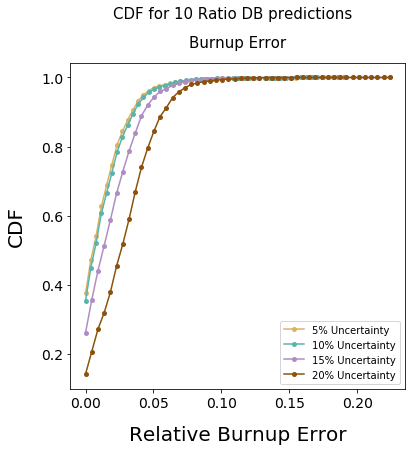

In [14]:
# in progre

### SFCOMPO test set

<Figure size 432x288 with 0 Axes>

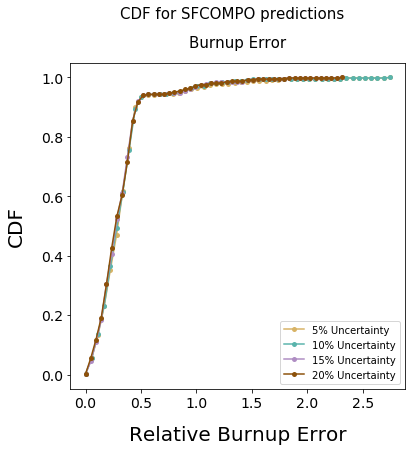